In [247]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.optimize import brentq
from scipy.stats import rv_discrete

In [248]:
def convert_odds_to_prob(type, odds):
    if type == "american":
        if odds < 0:
            return (-odds / (-odds + 100)) * 100
        else:
            return (100 / (odds + 100)) * 100

def no_vig_odds(team_a, team_b):
    prob_a = convert_odds_to_prob("american", team_a)
    prob_b = convert_odds_to_prob("american", team_b)
    total = prob_a + prob_b
    return prob_a/total * 100, prob_b/total * 100, total-100


In [249]:
print(no_vig_odds(168,-208))


(35.58883342577187, 64.41116657422813, 4.845900368288426)


In [357]:
def prob_outcome(differential, p):
    #assuming that A vs B and the differential is score A - score B with team A having winning probability p.
    if differential == 0:
       return 0
    elif differential == 1 or differential == -1:
        return (binom.pmf(k = 12, n = 24, p = 1-p)) / 2
    elif 0 < differential <= 13:
        return binom.pmf(k = 13 - differential, n= 2*13 - differential - 1, p=1-p) * p
    elif -13 <= differential < 0:
        return binom.pmf(k  = 13 + differential, n = 2*13 + differential - 1, p=p) * (1-p)
    else:
        return 0
#11-13

In [376]:
class round_diff_distro(rv_discrete):
    def set_p(self, p):
        self.p = p

    def _pmf(self, x):
        x_arr = np.asarray(x)
        flag = isinstance(x, np.ndarray) or isinstance(x, list)
        pmf_output = np.array([prob_outcome(k, self.p) for k in x_arr])
        return pmf_output if flag else pmf_output.item()
    
    def pmf_dict(self):
        return {k: prob_outcome(k, self.p) for k in range(-13,14)}

In [370]:
dict = {k :prob_outcome(k, 0.5) for k in range(-13,14)}
dict.get(-12,0)

0.0007934570312500008

In [503]:
diff_dist = round_diff_distro(a = -13, b = 13, name="game")
diff_dist.set_p(0.6)
outcomes = list(range(-13,14))
print(outcomes)
diff_dist.pmf(outcomes)

[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


array([6.71088640e-06, 5.23449139e-05, 2.19848638e-04, 6.59545915e-04,
       1.58291020e-03, 3.22913680e-03, 5.81244624e-03, 9.46598388e-03,
       1.41989758e-02, 1.98785662e-02, 2.62397073e-02, 3.29189055e-02,
       4.93783583e-02, 0.00000000e+00, 4.93783583e-02, 7.40675375e-02,
       8.85590122e-02, 1.00635241e-01, 1.07823473e-01, 1.07823473e-01,
       9.93110932e-02, 8.27592444e-02, 6.08523856e-02, 3.80327410e-02,
       1.90163705e-02, 6.79156089e-03, 1.30606940e-03])

In [378]:
dist.pmf_dict()

{-13: 6.710886399999996e-06,
 -12: 5.2344913919999994e-05,
 -11: 0.0002198486384640004,
 -10: 0.0006595459153920011,
 -9: 0.0015829101969407997,
 -8: 0.0032291368017592324,
 -7: 0.005812446243166618,
 -6: 0.009465983881728465,
 -5: 0.014198975822592714,
 -4: 0.019878566151629834,
 -3: 0.02623970732015135,
 -2: 0.03291890554709898,
 -1: 0.04937835832064849,
 0: 0,
 1: 0.04937835832064849,
 2: 0.07406753748097274,
 3: 0.08855901220551089,
 4: 0.10063524114262612,
 5: 0.10782347265281379,
 6: 0.10782347265281356,
 7: 0.09931109323285464,
 8: 0.08275924436071218,
 9: 0.06085238555934726,
 10: 0.038032740974591965,
 11: 0.019016370487296017,
 12: 0.006791560888319997,
 13: 0.0013060694015999915}

In [372]:
print(prob_outcome(-5, 0.5))

0.06006717681884772


In [466]:
def plot_round_diff_distro(p):
    distro = round_diff_distro(a = -13, b = 13, name="game")
    distro.set_p(p)
    plt.bar(distro.pmf_dict().keys(), distro.pmf_dict().values())
    return distro.pmf_dict().values()



In [646]:
class total_round_distro(rv_discrete):
    def set_p(self, p):
        self.p = p

    def _pmf(self, x):
        #support from 13 to 25
        x_arr = np.asarray(x)
        pmf_output = [prob_outcome(26 - tot, self.p) + prob_outcome(tot - 26, self.p) for tot in x_arr]
        #print(pmf_output)
        flag = isinstance(x, np.ndarray) or isinstance(x, list)
        return pmf_output if flag else pmf_output.item()
    


In [647]:
def plot_total_round_distro(p):
    total_dist = total_round_distro(a = 13, b = 24, name="total")
    total_dist.set_p(p)
    support = list(range(13,25))
    plt.bar(support, total_dist.pmf(support))
    return total_dist.pmf(support)

In [648]:
total_dist = total_round_distro(a = 13, b = 24, name="total")
total_dist.set_p(0.6)
support = list(range(13,25))


total_dist.pmf(support)

array([0.00131278, 0.00684391, 0.01923622, 0.03869229, 0.0624353 ,
       0.08598838, 0.10512354, 0.11728946, 0.12202245, 0.12051381,
       0.11479872, 0.10698644])

In [649]:
np.sum(total_dist.pmf(support))

0.9012432833587032

In [650]:
dist.set_p(0.503)
d = dist.pmf_dict()
for v in range(13,26):
    print(26-v, v-26, d[26 - v], d[v - 26])
   

13 -13 0.00013194222567483583 0.0001128841724501795
12 -12 0.0008524787200851159 0.0007381496036517254
11 -11 0.0029657734671761165 0.002599024754457724
10 -10 0.007369947065932659 0.006536547257461155
9 -9 0.014651454767074116 0.013151533082011856
8 -8 0.02475802826540187 0.022491751876856737
7 -7 0.03691422014371412 0.03394005358217681
6 -6 0.04979728297387039 0.04633787029783765
5 -5 0.06187312409503391 0.0582698718995308
4 -4 0.0717521995755409 0.06838940631941605
3 -3 0.07845385501589652 0.07567971703306574
2 -2 0.08152781969879205 0.07959442239595785
1 -1 0.08055532085546661 0.08055532085546661


dict_values([6.710886399999996e-06, 5.2344913919999994e-05, 0.0002198486384640004, 0.0006595459153920011, 0.0015829101969407997, 0.0032291368017592324, 0.005812446243166618, 0.009465983881728465, 0.014198975822592714, 0.019878566151629834, 0.02623970732015135, 0.03291890554709898, 0.04937835832064849, 0, 0.04937835832064849, 0.07406753748097274, 0.08855901220551089, 0.10063524114262612, 0.10782347265281379, 0.10782347265281356, 0.09931109323285464, 0.08275924436071218, 0.06085238555934726, 0.038032740974591965, 0.019016370487296017, 0.006791560888319997, 0.0013060694015999915])

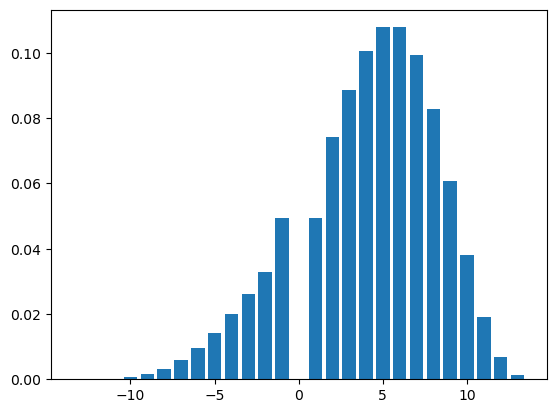

In [651]:
plot_round_diff_distro(0.6)

array([0.00131278, 0.00684391, 0.01923622, 0.03869229, 0.0624353 ,
       0.08598838, 0.10512354, 0.11728946, 0.12202245, 0.12051381,
       0.11479872, 0.10698644])

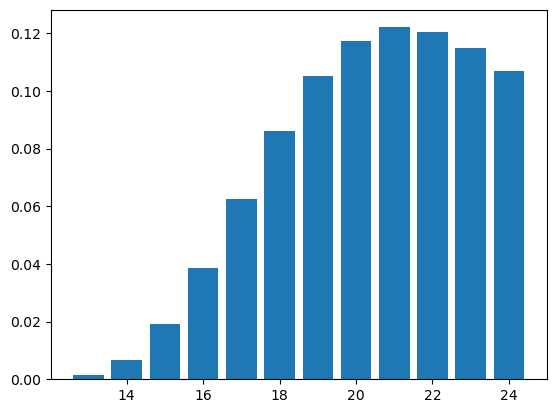

In [652]:
plot_total_round_distro(0.6)

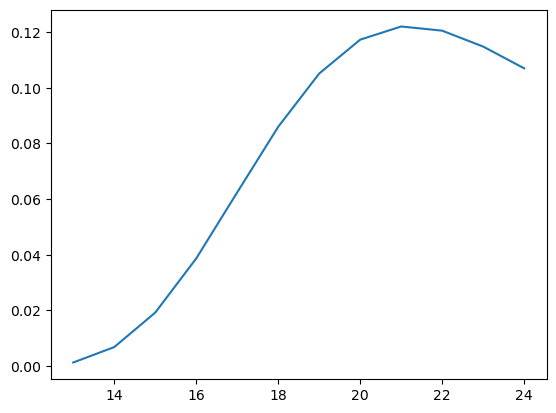

In [653]:
plt.plot(support, total_dist.pmf(support))

In [654]:
def f(total):
    return (26 - total)

f(20)

6

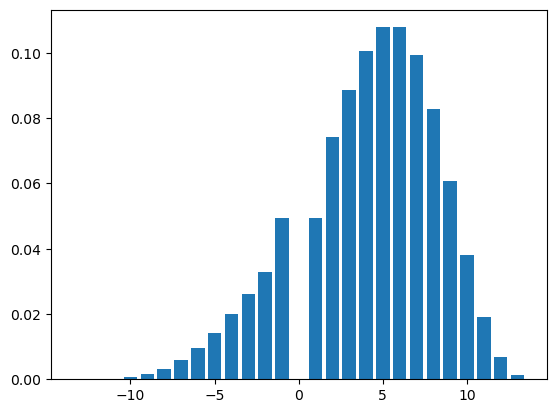

In [655]:
plot_distro(0.6)

In [656]:
np.sum(distro)

1.0

In [657]:
sz = len(distro)
print(distro[:12].size)
print(distro[15:].size)

12
12


In [658]:
distro[15:]
total = (distro[:12] + distro[15:][-1])
print(total)
total = np.insert(total, total.size, distro[13])
print(total.size)

[0.00131278 0.00135841 0.00152592 0.00196562 0.00288898 0.00453521
 0.00711852 0.01077205 0.01550505 0.02118464 0.02754578 0.03422497]
13


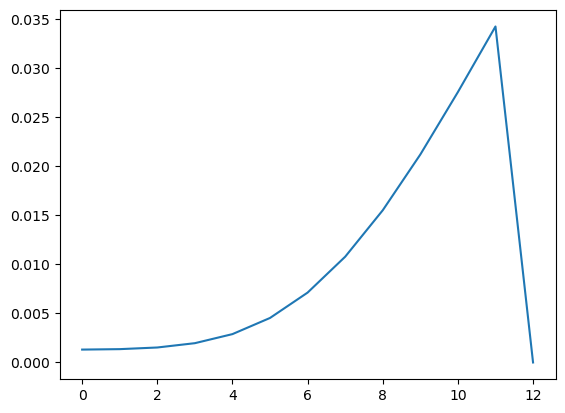

In [659]:
plt.plot(total)

In [660]:
list(range(24, 12,-1))

[24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13]

In [661]:
def prob_winning(p):
    distro = np.array([prob_outcome(s, p) for s in range(-13,14)])
    return np.sum(distro[14:])

In [662]:
def prob_losing(p):
    distro = np.array([prob_outcome(s, p) for s in range(-13,14)])
    return np.sum(distro[:13])

In [663]:
prob_winning(0.58614)+prob_losing(0.58614)

1.0000000000000004

In [664]:
def objective(p):
    return prob_winning(p) - 0.8

# Solving for p using the Brent method
p_solution = brentq(objective, 0, 1)  # p is a probability, so it ranges from 0 to 1
print(f"The solution for p is approximately: {p_solution}")

The solution for p is approximately: 0.5861447126222543


In [665]:
def solve_p(q):
    def objective(p):
        return prob_winning(p) - q
    p_solution = brentq(objective, 0, 1)
    return p_solution


In [666]:
prob_winning(p_solution)

0.8000000000000002

In [667]:
solve_p(0.7)

0.5539233189114676

In [668]:
def main(odds1, odds2):
    r, s, vig = no_vig_odds(odds1, odds2)
    q = max(r, s) * 0.01
    p_sol = solve_p(q)
    plot_round_diff_distro(p_sol)
    plot_total_round_distro(p_sol)
    diff_dist.set_p(p_sol)
    total_dist.set_p(p_sol)
    return r,s,vig, p_sol, diff_dist.mean(), diff_dist.median(), total_dist.mean(), total_dist.median()

(47.73218142548596,
 52.26781857451404,
 4.7511312217194615,
 0.5058654903750249,
 0.25579867310004545,
 1.0,
 17.943452448875345,
 22.0)

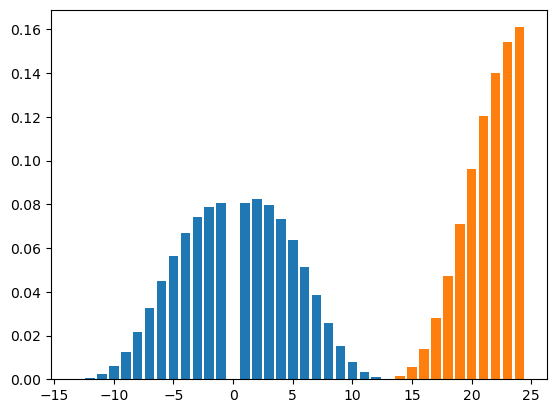

In [669]:
main(100, -121)

(40.75583549462764,
 59.24416450537237,
 4.85625485625485,
 0.524100963246073,
 1.0480779657495605,
 2.0,
 17.981646491335173,
 22.0)

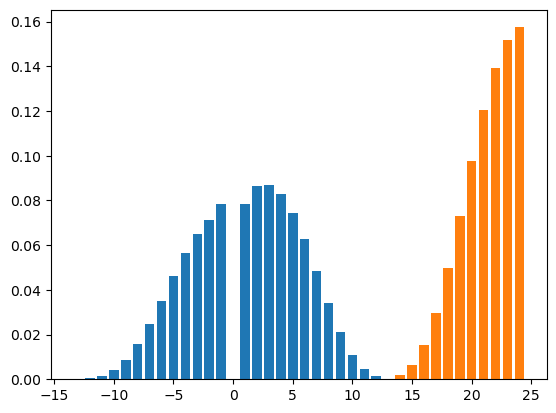

In [670]:
main(134, -164)

In [671]:
print(a,b,c,p_test)

40.75583549462764 59.24416450537237 4.85625485625485 0.524100963246073


dict_values([6.422331740136466e-05, 0.00043757353266787565, 0.0016053289697355484, 0.004206772296826123, 0.008819093651693876, 0.015715124624554287, 0.02470893585978289, 0.03514993780186513, 0.046055290649992635, 0.05632111844855774, 0.06493949534596764, 0.07116378158739237, 0.07837167885983887, 0, 0.07837167885983887, 0.08630963546768425, 0.08673798037539525, 0.08284604857579266, 0.07460710496874622, 0.0627083471129808, 0.04854616939285122, 0.03400312926594756, 0.021014794315519267, 0.0110395234558887, 0.0046394392941782395, 0.0013926841427253482, 0.00022510982617475798])

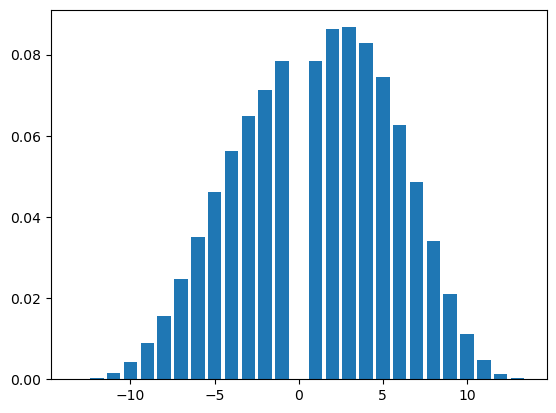

In [672]:
plot_round_diff_distro(p_test)

array([0.00028933, 0.00183026, 0.00624477, 0.0152463 , 0.02983389,
       0.04971825, 0.07325511, 0.09785828, 0.1206624 , 0.13916717,
       0.15167748, 0.15747342])

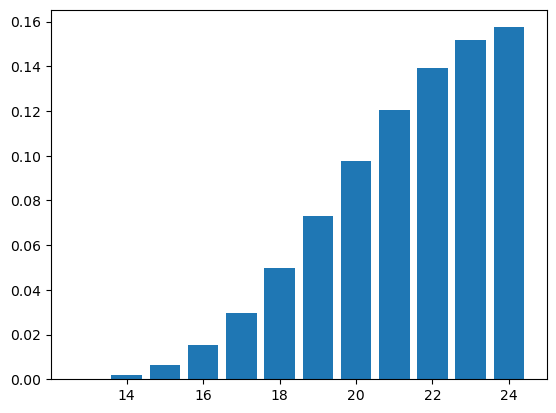

In [673]:
plot_total_round_distro(p_test)

In [674]:
diff_dist.set_p(p_test)
diff_dist.mean()
diff_dist.median()

2.0

In [675]:
total_dist.set_p(p_test)
total_dist.mean()

17.981646491335173

In [580]:
total_dist.median()

22.0